In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 1 Laplace

In [14]:
def ber_inv(x, p):
    if x <= p:
        return -1
    else:
        return 1
    
def exp_inv(x, l):
    return -(1/l)*np.log(x)

In [28]:
p = 0.5
l = 0.5

array_1 = np.random.default_rng().uniform(0,1,size=10000)
array_ber = [ber_inv(x, p) for x in array_1]

array_2 = np.random.default_rng().uniform(0,1,size=10000)
array_exp = [exp_inv(x, l) for x in array_2]

array_lap = np.array(array_ber)*np.array(array_exp)

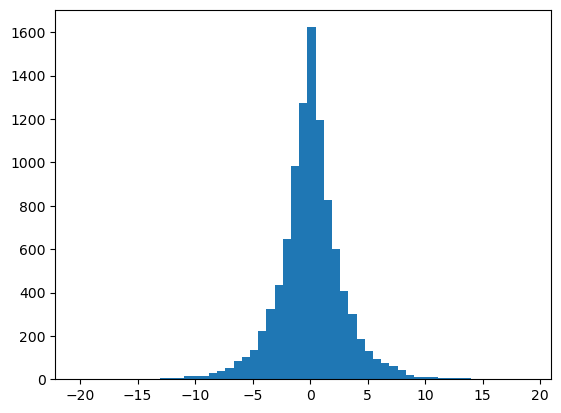

In [30]:
plt.hist(array_lap, bins=3)
plt.show()

In [35]:
stats.kstest(array_lap, stats.laplace.cdf, args={"scale":0.5,"size":0.5})

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U5')) -> None

In [ ]:
stats.laplace.rvs()

## 2 Aceptación rechazo

In [96]:
def lap(l):
    return exp_inv(unif(0,1),l) * ber_inv(unif(0,1), 1/2)

unif = np.random.default_rng().uniform

In [88]:
def gaussian(x,s):
    return np.exp(-x**2/(2*s**2))/(np.sqrt(2*np.pi)*s**2)

def laplace(x,l):
    return l*np.exp(-l*abs(x))/2

In [144]:
def acep_rec(M, l, s):
    flag = True
    while flag:
        y = gen_lap(l)
        u = unif(0,1)
        if u <= gaussian(y,s)/(M*laplace(y,l)):
            flag = False
    return y

In [167]:
M = 5
l = 0.5
s = 1

In [166]:
acep_rec(M, l, s)

0.8688291540595541

## 3

In [ ]:
M = 5
l = 0.5
s = 1

In [108]:
n = 1000
nu = 5
N = 4*nu + n*nu

In [172]:
Y = []
for i in range(N):
    Y.append(acep_rec(M, l, s))

In [175]:
N

5020

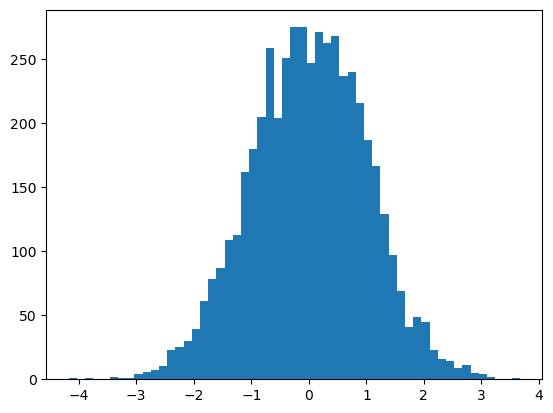

In [174]:
plt.hist(Y, bins=55)
plt.show()